# DATA CLEANING 

In [33]:
#importing Libraries

import pandas as pd
import numpy as np
import regex as re

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#loading dataset as dataframe

pd_tweets=pd.read_csv("covid19_tweets.csv")

In [35]:
pd_tweets.head(50)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,"🎼 #Новоро́ссия #Novorossiya #оставайсядома #STAYatHOME Polymath, composer, English.",2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise. It's almost as bad as it ever was. Politicians and businesses want… https://t.co/hXMHooXX2C,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a friendly place. Corporate blog of @ITMGroup by @Sharlyn_Lauby. Cheers!,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK","['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… https://t.co/OSu5Q4kdd7,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @ChouhanShivraj .\n#covid19\n#covidPositive,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & all the members of the body, though many, are one body, so it is with Christ. 1 Corinthians 12:12",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at https://t.co/7X5RTyKVji \n\n#HurricaneHanna #COVID19… https://t.co/06dZcGUnwL,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [36]:
#Lower Case Conversion of strings
pd_tweets['user_name']=pd_tweets['user_name'].str.lower()
pd_tweets['user_location']=pd_tweets['user_location'].str.lower()
pd_tweets['user_description']=pd_tweets['user_description'].str.lower()
pd_tweets['text']=pd_tweets['text'].str.lower()
pd_tweets['hashtags']=pd_tweets['hashtags'].str.lower()

#Removing usernames and hashtags and links from tweets
pd_tweets['text']=pd_tweets['text'].str.replace('(@\w+.*?)',"",regex=True)
pd_tweets['text'] = pd_tweets['text'].str.replace("#[A-Za-z0-9_]+","", regex=True)
pd_tweets['text']=pd_tweets['text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",regex=True)


#Remove special charecters from tweets
pd_tweets['text']=pd_tweets['text'].str.replace('[@,#,%,:,?,-,$,_,.,!,/,),(,=,;,*]',"",regex=True) 
pd_tweets['text']=pd_tweets['text'].str.replace(r'-',"",regex=True) 
pd_tweets['text']=pd_tweets['text'].str.replace('\[',"",regex=True) 
pd_tweets['text']=pd_tweets['text'].str.replace(']',"",regex=True) 


In [37]:
#removing newline character from tweets and punctuation marks
pd_tweets['text']=pd_tweets['text'].str.replace('\n',"",regex=True)
pd_tweets['text'] = pd_tweets['text'].str.replace('[()!?]', ' ', regex=True)
pd_tweets['text'] = pd_tweets['text'].str.replace('\[.*?\]',' ', regex=True)


In [38]:
#filtering out non-alpha numeric charecters (including emojis etc)

pd_tweets['text'] = pd_tweets['text'].str.replace("[^a-z0-9]"," ", regex=True)

In [39]:
pd.set_option("display.max_colwidth", None)
pd_tweets[['text']].head(50)

,text
0,if i smelled the scent of hand sanitizers today on someone in the past i would think they were so intoxicated that
1,hey and wouldn t it have made more sense to have the players pay their respects to the a
2,trump never once claimed was a hoax we all claim that this effort to
3,the one gift has give me is an appreciation for the simple things that were always around me
4,25 july media bulletin on novel
5,deaths continue to rise it s almost as bad as it ever was politicians and businesses want
6,how will change work in general and recruiting specifically via
7,you now have to wear face coverings when out shopping this includes a visit to your local community pharmacy
8,praying for good health and recovery of
9,pope as god prophet sadhu sundar selvaraj watch here at


In [40]:
#Description of Dataset
pd_shape=pd_tweets.shape
pd_summ=pd_tweets.describe()
pd_dtypes=pd_tweets.dtypes

print("Shape of Data is: ", pd_shape,"\n\nDescriptive Stats of Dataset:\n\n",pd_summ,"\n\nDatatypes of Dataframe:\n\n ",pd_dtypes)

Shape of Data is:  (179108, 13) 

Descriptive Stats of Dataset:

        user_followers   user_friends  user_favourites
count    1.791080e+05  179108.000000     1.791080e+05
mean     1.090555e+05    2121.701566     1.444411e+04
std      8.414670e+05    9162.553072     4.452270e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.720000e+02     148.000000     2.060000e+02
50%      9.920000e+02     542.000000     1.791000e+03
75%      5.284000e+03    1725.250000     9.388000e+03
max      4.944256e+07  497363.000000     2.047197e+06 

Datatypes of Dataframe:

  user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object


# Exploratory Data Analysis

In [9]:
#Number of missing tweets after cleaning

print("Number of Missing Tweets Are: ",pd_tweets['text'].isna().sum())

Number of Missing Tweets Are:  0


In [7]:
pd_tweets.to_csv("updated_tweets.csv")

Text(0, 0.5, 'Frequency')

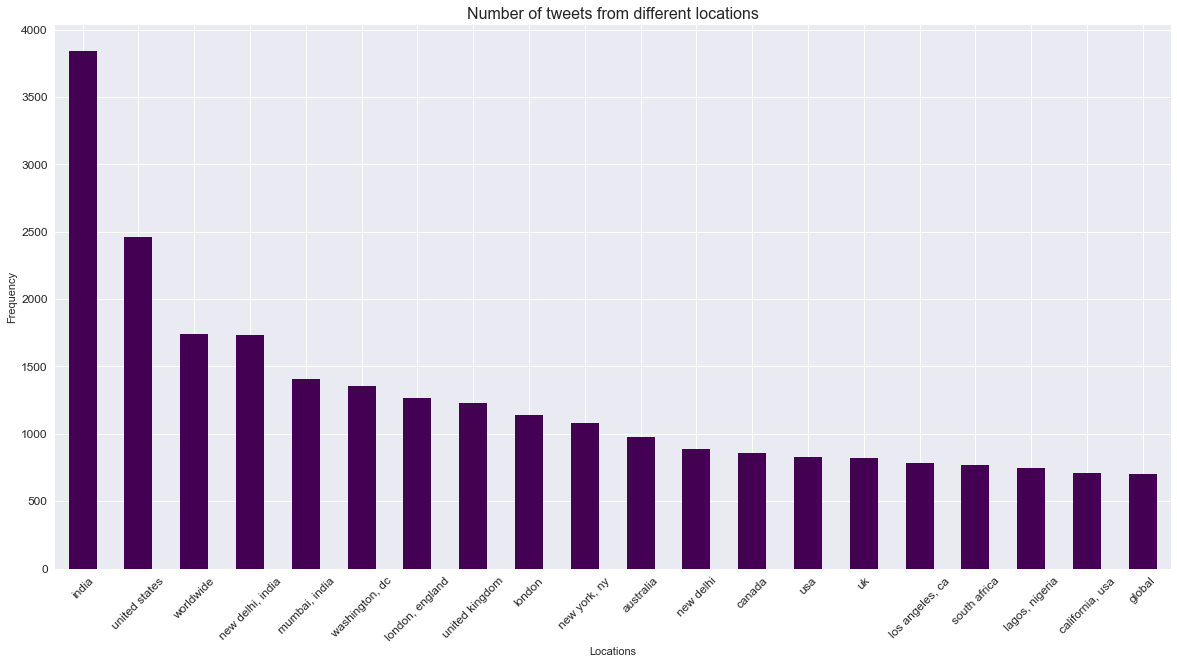

In [91]:
# this is to show the top 20 user locations of the tweets 

location = pd_tweets.value_counts('user_location')
top20Locations = location.head(20)

top20Locations.to_frame()
plt.style.use('seaborn')
plt.figure( figsize=(20,10) )
plt.title("Number of tweets from different locations",fontsize= 16)
chart = top20Locations.plot(kind='bar', stacked=True, rot='45', colormap='viridis',fontsize= 12)
chart.set_xlabel("Locations")
chart.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

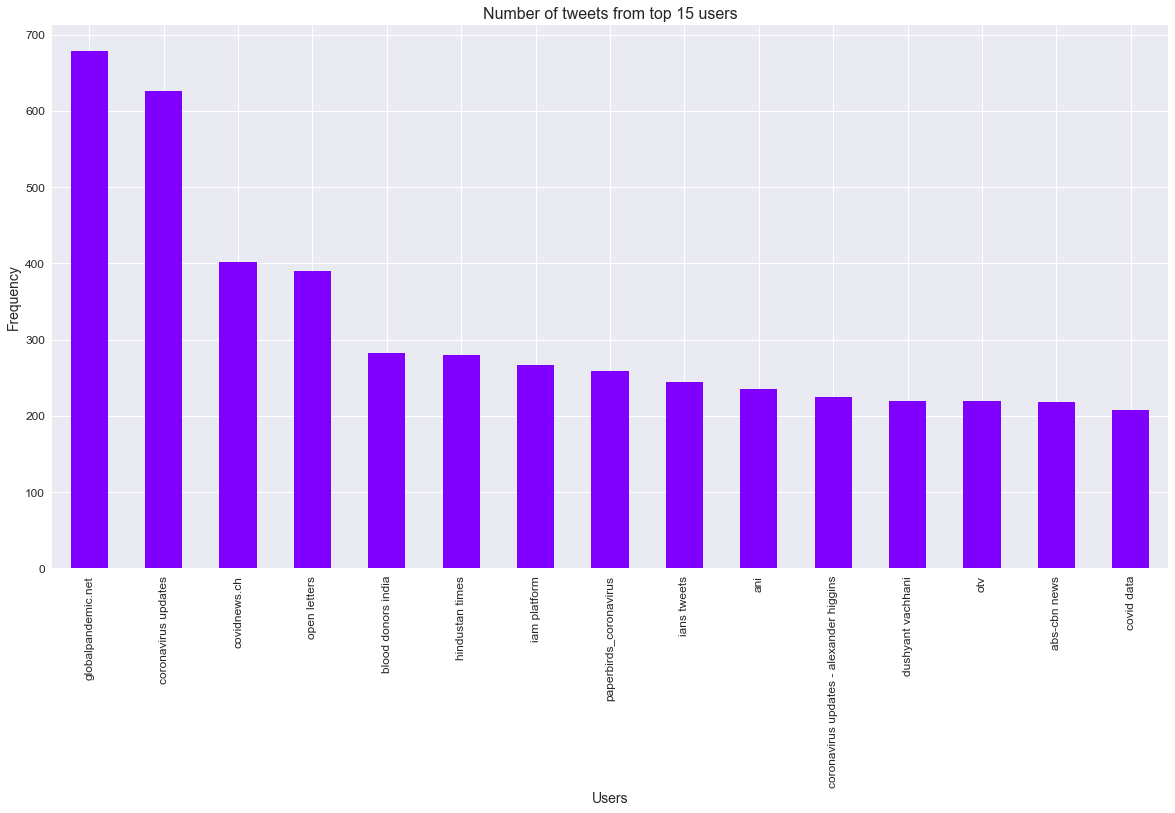

In [92]:
# this is to show the top 15 user  of tweets

user = pd_tweets.value_counts('user_name')
top20Users = user.head(15)

plt.figure( figsize=(20,10) )
plt.title("Number of tweets from top 15 users",fontsize= 16)
chart = top20Users.plot(kind='bar', stacked=True, colormap='rainbow',fontsize= 12)
chart.set_xlabel("Users",fontsize= 14)
chart.set_ylabel("Frequency",fontsize= 14)

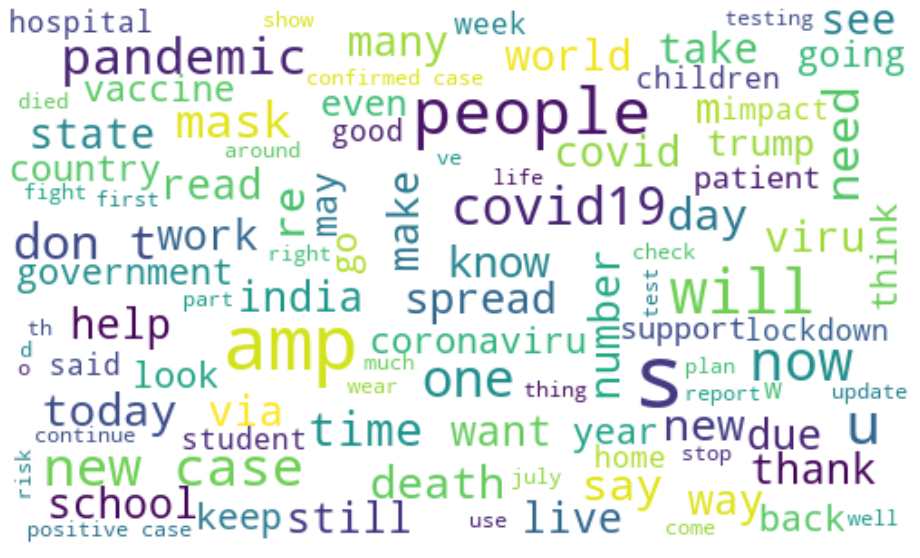

In [47]:
# this is to generate the most common words in the tweets
text = " ".join(tweet for tweet in pd_tweets["text"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, background_color='white',max_words=100,width=500, height=300).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
pd_tweets['formatted_date'] = pd_tweets['date'].str.split(" ")
pd_tweets[['formatted_date','formatted_time']] = pd_tweets['date'].str.split(" ",2,expand=True)

pd_tweets["formatted_date"] = pd.to_datetime(pd_tweets["formatted_date"])
pd_tweets = pd_tweets.sort_values(by="date")
pd_tweets.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,formatted_date,formatted_time
17175,jessica luther rummel,"denton, texas",mother. partner. scholar. activist. alchemist. \njai kali ma,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,protestors needed 6pm10pm daily now 1450 e mckinney denton county jail covid19 outbreak released trustee repo,NaN,Twitter Web App,False,2020-07-24,23:47:08


In [101]:
pd_tweets.tail(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,formatted_date,formatted_time
166656,🍺¯\_(ツ)_/¯,"boston, ma","father, husband, musician, dog-lover. all opinions are my own and should probably be yours too.",2009-04-13 13:14:46,24,197,1409,False,2020-08-30 09:07:39,it s a shame magots can t celebrate s revisionist math in the cdc s updated death toll on accoun,NaN,Twitter for iPhone,False,2020-08-30,09:07:39


Text(0, 0.5, 'FREQUENCY OF TWEETS')

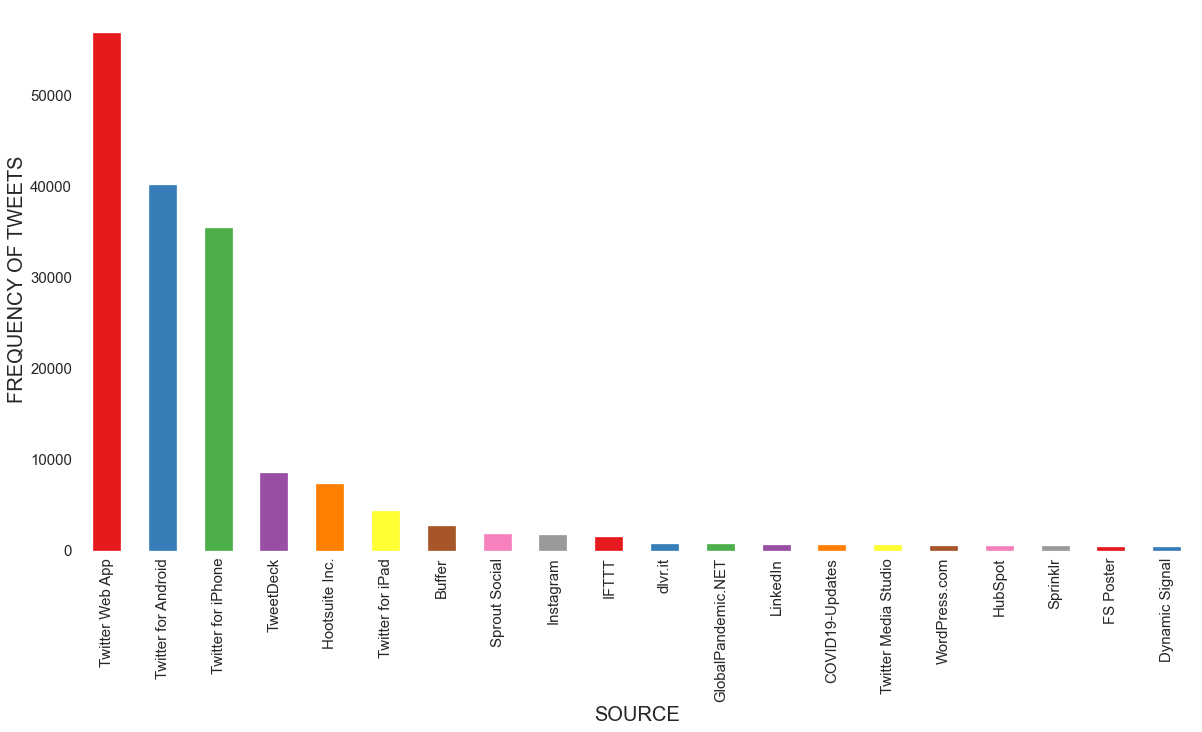

In [30]:
# this is to generate the most common devices used to tweet

source = pd_tweets.value_counts('source')
top20sources = source.head(20)
my_cmap = plt.get_cmap("Set1")

plt.style.use('seaborn')
sns.set_style(style='white')
plt.figure( figsize=(20,10) )
chart = top20sources.plot(kind='bar', stacked=True, color=my_cmap.colors, rot='90',fontsize= 15)
chart.set_xlabel("SOURCE",fontsize= 20)
chart.set_ylabel("FREQUENCY OF TWEETS",fontsize= 20)